<a href="https://colab.research.google.com/github/charanchandu/ECE539_FinalProject/blob/main/Project_ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
senti_df = pd.read_csv('finalSentimentdata2.csv')

In [2]:
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [3]:
senti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [4]:
senti_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

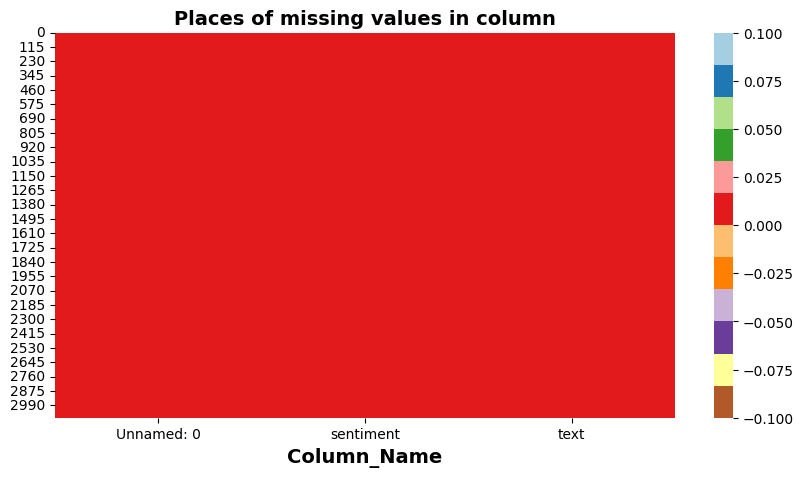

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string
plt.figure(figsize=(10, 5))
sns.heatmap(senti_df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

punc = string.punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer."""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    # Making text lowercase
    text = text.lower()

    # Removing text in square brackets, links, punctuation, and words containing numbers
    pattern = r'\[.*?\]|\bhttps?://\S+|www\.\S+|<.*?>+|[{}]|\w*\d\w*'.format(re.escape(punc))
    text = re.sub(pattern, '', text)

    # Tokenizing the text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Lemmatizing words with POS tagging
    words = pos_tag(words)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in words]

    # Rejoining the words to form the cleaned text
    text = " ".join(words)

    return text

# Applying the clean_text function to the 'text' column
senti_df['text'] = senti_df['text'].apply(clean_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

senti_df['text'] = senti_df['text'].apply(remove_emoji)


In [8]:
senti_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree poor india treat badly poor seek live si...
1,1431,joy,could spend cutie vc sakshis n g h coast cross...
2,654,joy,nature conservation remain priority post coron...
3,2530,sad,coronavirus disappear italy show intellectual ...
4,2296,sad,uk record low daily virus death toll since sta...


In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing sets (70% training, 30% test+validation)
train, test_valid = train_test_split(senti_df, test_size=0.3, random_state=0, stratify=senti_df.sentiment.values)

# Splitting the remaining data (test_valid) into Test and Validation sets (50% each)
test, valid = train_test_split(test_valid, test_size=0.5, random_state=0, stratify=test_valid.sentiment.values)

print("train shape:", train.shape)
print("valid shape:", valid.shape)
print("test shape:", test.shape)


train shape: (2163, 3)
valid shape: (464, 3)
test shape: (463, 3)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))  # Convert the set to a list

X_train1 = vectorizer.fit_transform(train['text'].values)
X_valid1 = vectorizer.transform(valid['text'].values)

y_train1 = train['sentiment'].values
y_valid1 = valid['sentiment'].values

print(f"X_train.shape: {X_train1.shape}")
print(f"X_valid.shape: {X_valid1.shape}")
print(f"y_train.shape: {y_train1.shape}")
print(f"y_valid.shape: {y_valid1.shape}")


X_train.shape: (2163, 6714)
X_valid.shape: (464, 6714)
y_train.shape: (2163,)
y_valid.shape: (464,)


In [11]:
!pip install nlpaug
import nlpaug.augmenter.word as naw

# Function for data augmentation using synonym replacement
def augment_text(sentiment, text, aug_p=0.3, aug_max=5):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_texts = [aug.augment(text) for _ in range(aug_max)]
    augmented_texts.append(text)  # Include original text in the augmented data
    augmented_sentiments = [sentiment] * (aug_max + 1)
    return pd.DataFrame({'sentiment': augmented_sentiments, 'text': augmented_texts})


# Applying data augmentation to the 'text' column in the original dataset and creating a new DataFrame
augmented_data = train.apply(lambda row: augment_text(row['sentiment'], row['text'], aug_p=0.3, aug_max=5), axis=1)

# Concatenating the augmented DataFrames
augmented_train_df = pd.concat(augmented_data.tolist(), ignore_index=True)
augmented_train_df = pd.concat([train, augmented_train_df], ignore_index=True)

# Saving the augmented DataFrame as a CSV file
augmented_train_df.to_csv('augmented_dataset.csv', index=False)

print("Augmented dataset saved as 'augmented_dataset.csv'")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.0 MB/s eta 0:00:00
Augmented dataset saved as 'augmented_dataset.csv'


In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function for text preprocessing
def preprocess_text(text):
    # Checking for NaN
    if isinstance(text, str):
        #lowercase
        text = text.lower()

        # Removing text in square brackets, links, punctuation, and words containing numbers
        text = re.sub(r'[\'\[\]]', '', text)
        return text

        # Tokenization and removing stopwords
        stop_words = set(stopwords.words('english'))
        words = nltk.word_tokenize(text)
        words = [word for word in words if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Joining the processed words back to form the preprocessed text
        preprocessed_text = ' '.join(words)
        return preprocessed_text
    else:
        return ""

# Loading the augmented dataset
augmented_df = pd.read_csv('augmented_dataset.csv')

# Preprocessing the 'text' column
augmented_df['preprocessed_text'] = augmented_df['text'].apply(preprocess_text)


# Splitting the data into training and testing sets
X = augmented_df['preprocessed_text'].astype(str)
y = augmented_df['sentiment']
# Splitting the data into training and test sets (85% training and 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Splitting the training data into training and validation sets (70% training and 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Vectorizing the text data using CountVectorizer
stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))  # Convert the set to a list

X_train_counts = vectorizer.fit_transform(X_train.values)
X_val_counts = vectorizer.transform(X_val.values)
X_test_counts = vectorizer.transform(X_test.values)

print(f"X_train.shape: {X_train_counts.shape}")
print(f"X_valid.shape: {X_val_counts.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_valid.shape: {y_val.shape}")
print(X_train)


X_train.shape: (10938, 11092)
X_valid.shape: (1931, 11092)
y_train.shape: (10938,)
y_valid.shape: (1931,)
12059    "ppl imagine create gap constituency ppl r rid...
9730                  u test few people thus far kid child
1295     coronavirus outbreak cause entire school freak...
9490     mpa p begin “ rashan bag ” distribution local ...
8794                           forget still attack covid …
                               ...                        
5063     "delight look on newfangled song “ bahar mat n...
9197                       get coronavirus full grown deal
9270     thiè bravo nonnetto di anni ce lhai fatta veni...
6594     redheart saptak news lockdown music video squa...
1008     financial capital town worst affect like neith...
Name: preprocessed_text, Length: 10938, dtype: object


In [13]:
print(augmented_df['preprocessed_text'])
augmented_df[['sentiment', 'preprocessed_text']].to_csv('preprocessed_dataset.csv', index=False)

0        honble prime minister bihar chief minister req...
1        ive always type need control know next coronav...
2        respect sir collegues terminate school without...
3        rather u guy r safe indoors pls say thanks enj...
4                          finally accept credit go medium
                               ...                        
15136    park reopen aftermath seism major stadium like...
15137    park reopen aftermath quake major stadium also...
15138    park reopen aftermath quake major stadium as w...
15139    park reopen aftermath quake major bowl too und...
15140    park reopen aftermath quake major stadium also...
Name: preprocessed_text, Length: 15141, dtype: object


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initializing the SVM classifier
svm_classifier = SVC()

# Training the classifier
svm_classifier.fit(X_train_counts, y_train)

# Loading the original dataset (non-augmented data)
original_df = pd.read_csv('finalSentimentdata2.csv')
original_df['preprocessed_text'] = original_df['text'].apply(preprocess_text)

# Splitting the data into training, validation, and testing sets (70%, 15%, 15%)
X_train_original, temp_X, y_train_original, temp_y = train_test_split(original_df['preprocessed_text'], original_df['sentiment'], test_size=0.3, random_state=42)
X_val_original, X_test_original, y_val_original, y_test_original = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

# Transforming the original data using the same CountVectorizer
X_train_original_counts = vectorizer.transform(X_train_original.values)
X_val_original_counts = vectorizer.transform(X_val_original.values)
X_test_original_counts = vectorizer.transform(X_test_original.values)

# Printing the shapes of the original data
print("\nOriginal Data:")
print("Training shape (original data):", X_train_original_counts.shape, y_train_original.shape)
print("Validation shape (original data):", X_val_original_counts.shape, y_val_original.shape)
print("Test shape (original data):", X_test_original_counts.shape, y_test_original.shape)




Original Data:
Training shape (original data): (2163, 11092) (2163,)
Validation shape (original data): (463, 11092) (463,)
Test shape (original data): (464, 11092) (464,)


Training Accuracy (SVM): 0.9902175900530261
Validation Accuracy (original data): 0.8423326133909287
Test Accuracy (original data): 0.8318965517241379
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.82      0.80      0.81       122
        fear       0.83      0.78      0.80       118
         joy       0.81      0.93      0.86       109
         sad       0.92      0.87      0.89       114

    accuracy                           0.84       463
   macro avg       0.84      0.84      0.84       463
weighted avg       0.84      0.84      0.84       463

Test Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.80      0.82       125
        fear       0.85      0.81      0.83       119
         joy       0.75      0.92      0.83       105
         sad       0.90      0.81      0.85       115

    accuracy                           0.83       464
   macro avg       0.84  

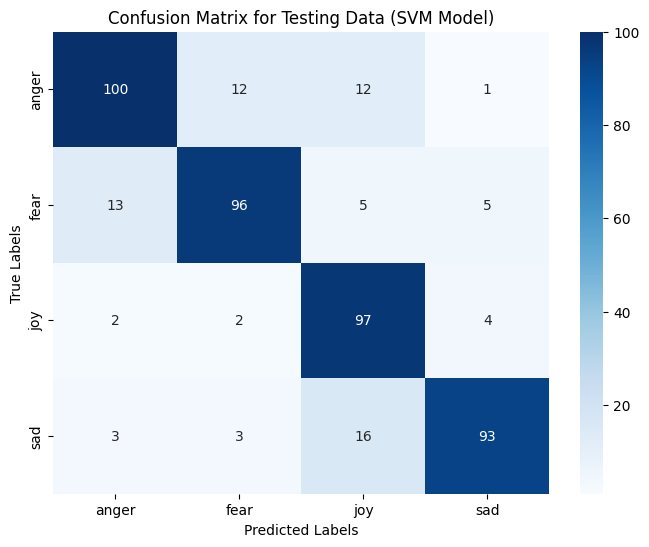

In [15]:
stop = set(stopwords.words('english'))

# Transforming the original validation and test sets using the same CountVectorizer
X_val_original_counts = vectorizer.transform(X_val_original.values)
X_test_original_counts = vectorizer.transform(X_test_original.values)

# Making predictions on the validation set using the SVM classifier trained on augmented data
y_pred_val_original = svm_classifier.predict(X_val_original_counts)

#Printing Training Accuracy
y_pred_train_rf = svm_classifier.predict(X_train_counts)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (SVM):", accuracy_train_svm)

# Calculating accuracy for validation set (original data)
y_pred_val_svm = svm_classifier.predict(X_val_original_counts)
accuracy_val_svm = accuracy_score(y_val_original, y_pred_val_svm)
print("Validation Accuracy (original data):", accuracy_val_svm)

# Making predictions on the test set using the SVM classifier trained on the original data
y_pred_test_original = svm_classifier.predict(X_test_original_counts)

# Calculating accuracy for test set (original data)
accuracy_test_svm = accuracy_score(y_test_original, y_pred_test_original)
print("Test Accuracy (original data):", accuracy_test_svm)

# Printing classification report for the validation set
svm_validation_creport = (classification_report(y_val_original, y_pred_val_svm))
print(f"Validation Classification Report:\n {svm_validation_creport}")

# Printing classification report for the test set
svm_test_creport = (classification_report(y_test_original, y_pred_test_original))
print(f"Test Classification Report:\n {svm_test_creport}")

# Calculate the confusion matrix for the testing data
confusion_mat_svm = confusion_matrix(y_test_original, y_pred_test_original)

print("Confusion Matrix for Testing Data (SVM Model):")
print(confusion_mat_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sad'], yticklabels=['anger', 'fear', 'joy', 'sad'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data (SVM Model)')
plt.show()

Training Accuracy (Random Forest): 1.0
Validation Accuracy (Random Forest): 0.8358531317494601
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.84      0.84       122
        fear       0.80      0.76      0.78       118
         joy       0.80      0.85      0.83       109
         sad       0.90      0.89      0.89       114

    accuracy                           0.84       463
   macro avg       0.84      0.84      0.84       463
weighted avg       0.84      0.84      0.84       463

Test Accuracy (Random Forest): 0.8383620689655172
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.81      0.83      0.82       125
        fear       0.91      0.73      0.81       119
         joy       0.75      0.94      0.84       105
         sad       0.92      0.86      0.89       115

    accuracy                           0.84       464
   macro avg       0.85      0

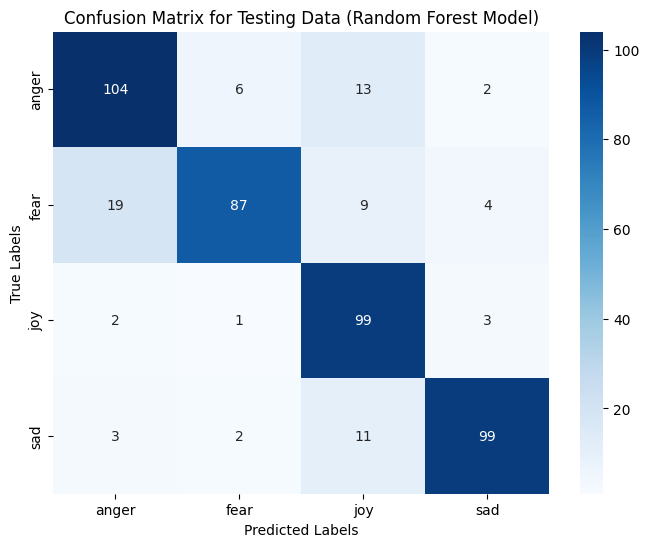

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the original training data
rf_classifier.fit(X_train_counts, y_train)

y_pred_train_rf = rf_classifier.predict(X_train_counts)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (Random Forest):", accuracy_train_rf)

# Making predictions on the validation set using the Random Forest classifier trained on the original data
y_pred_val_rf = rf_classifier.predict(X_val_original_counts)

# Calculating accuracy for the validation set (original data)
accuracy_val_rf = accuracy_score(y_val_original, y_pred_val_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# Printing classification report for the validation set
rf_validation_creport = (classification_report(y_val_original, y_pred_val_rf))
print(f"Validation Classification Report:\n {rf_validation_creport}")

# Making predictions on the test set using the Random Forest classifier trained on the original data
y_pred_test_rf = rf_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_rf = accuracy_score(y_test_original, y_pred_test_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)

# Printing classification report for the test set
rf_test_creport = (classification_report(y_test_original, y_pred_test_rf))
print(f"Test Classification Report:\n {rf_test_creport}")

# Calculating the confusion matrix for the test set (original data)
conf_matrix_rf = confusion_matrix(y_test_original, y_pred_test_rf)

print("Confusion Matrix for Testing Data (Random Forest Model):")
print(conf_matrix_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sad'], yticklabels=['anger', 'fear', 'joy', 'sad'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data (Random Forest Model)')
plt.show()

Training Accuracy (Logistic Regression): 0.9977143901993052
Validation Accuracy (Logistic Regression): 0.8488120950323974
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.82      0.83       122
        fear       0.80      0.80      0.80       118
         joy       0.83      0.93      0.87       109
         sad       0.93      0.86      0.89       114

    accuracy                           0.85       463
   macro avg       0.85      0.85      0.85       463
weighted avg       0.85      0.85      0.85       463

Test Accuracy (Logistic Regression): 0.8469827586206896
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.82      0.83       125
        fear       0.84      0.80      0.82       119
         joy       0.82      0.92      0.87       105
         sad       0.90      0.85      0.88       115

    accuracy                           0.85       4

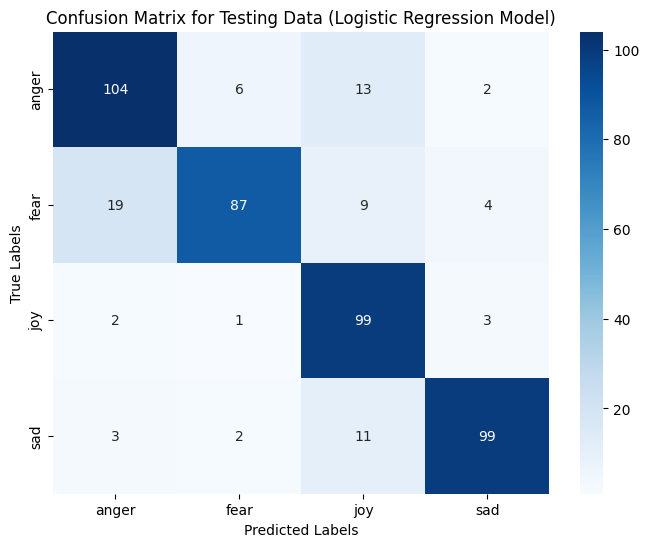

In [17]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)

# Training the classifier on the original training data
logistic_regression_classifier.fit(X_train_counts, y_train)

y_pred_train_lr = logistic_regression_classifier.predict(X_train_counts)
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
print("Training Accuracy (Logistic Regression):", accuracy_train_lr)

# Making predictions on the validation set using the Logistic Regression classifier trained on the original data
y_pred_val_lr = logistic_regression_classifier.predict(X_val_original_counts)

# Calculating accuracy for the validation set (original data)
accuracy_val_lr = accuracy_score(y_val_original, y_pred_val_lr)
print("Validation Accuracy (Logistic Regression):", accuracy_val_lr)

# Printing classification report for the validation set
lr_validation_creport = (classification_report(y_val_original, y_pred_val_lr))
print(f"Validation Classification Report:\n {lr_validation_creport}")

# Making predictions on the test set using the Logistic Regression classifier trained on the original data
y_pred_test_lr = logistic_regression_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_lr = accuracy_score(y_test_original, y_pred_test_lr)
print("Test Accuracy (Logistic Regression):", accuracy_test_lr)

# Printing classification report for the test set
lr_test_creport = (classification_report(y_test_original, y_pred_test_lr))
print(f"Test Classification Report:\n {lr_test_creport}")

# Calculating the confusion matrix for the test set (original data)
conf_matrix_lr = confusion_matrix(y_test_original, y_pred_test_rf)

print("Confusion Matrix for Testing Data (Logistic Regression Model):")
print(conf_matrix_lr)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sad'], yticklabels=['anger', 'fear', 'joy', 'sad'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data (Logistic Regression Model)')
plt.show()

Training Accuracy (Naive Bayes): 1.0
Validation Accuracy (Naive Bayes): 0.8250539956803455
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.80      0.82       122
        fear       0.73      0.79      0.76       118
         joy       0.89      0.90      0.89       109
         sad       0.85      0.82      0.84       114

    accuracy                           0.83       463
   macro avg       0.83      0.83      0.83       463
weighted avg       0.83      0.83      0.83       463

Test Accuracy (Naive Bayes): 0.8469827586206896
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.86      0.87       125
        fear       0.77      0.85      0.81       119
         joy       0.89      0.83      0.86       105
         sad       0.87      0.85      0.86       115

    accuracy                           0.85       464
   macro avg       0.85      0.85   

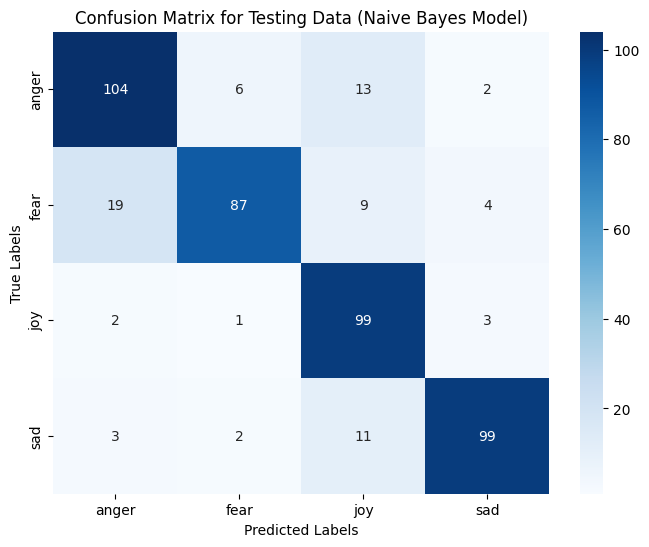

In [18]:
from sklearn.naive_bayes import MultinomialNB
# Initializing the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Training the classifier on the original training data
naive_bayes_classifier.fit(X_train_counts, y_train)

# Making predictions on the validation set using the Naive Bayes classifier trained on the original data
y_pred_val_nb = naive_bayes_classifier.predict(X_val_original_counts)

accuracy_train_nb = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (Naive Bayes):", accuracy_train_rf)

# Calculating accuracy for the validation set (original data)
accuracy_val_nb = accuracy_score(y_val_original, y_pred_val_nb)
print("Validation Accuracy (Naive Bayes):", accuracy_val_nb)

# Printing classification report for the validation set
nb_validation_creport = (classification_report(y_val_original, y_pred_val_nb))
print(f"Validation Classification Report:\n {nb_validation_creport}")




# Making predictions on the test set using the Naive Bayes classifier trained on the original data
y_pred_test_nb = naive_bayes_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_nb = accuracy_score(y_test_original, y_pred_test_nb)
print("Test Accuracy (Naive Bayes):", accuracy_test_nb)

# Printing classification report for the test set
nb_test_creport = (classification_report(y_test_original, y_pred_test_nb))
print(f"Test Classification Report:\n {nb_test_creport}")

# Calculating the confusion matrix for the test set (original data)
conf_matrix_nb = confusion_matrix(y_test_original, y_pred_test_rf)

print("Confusion Matrix for Testing Data (Naive Bayes Model):")
print(conf_matrix_nb)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sad'], yticklabels=['anger', 'fear', 'joy', 'sad'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data (Naive Bayes Model)')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training Accuracy (XGBoost): 0.9701956481989394
Validation Accuracy (XGBoost): 0.7796976241900648
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.72      0.75      0.74       122
        fear       0.77      0.66      0.71       118
         joy       0.76      0.89      0.82       109
         sad       0.88      0.82      0.85       114

    accuracy                           0.78       463
   macro avg       0.78      0.78      0.78       463
weighted avg       0.78      0.78      0.78       463

Test Accuracy (XGBoost): 0.8060344827586207
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.77      0.80      0.78       125
        fear       0.88      0.72      0.79       119
         joy       0.73      0.94      0.83       105
         sad       0.88      0.77      0.82       115

    accuracy             

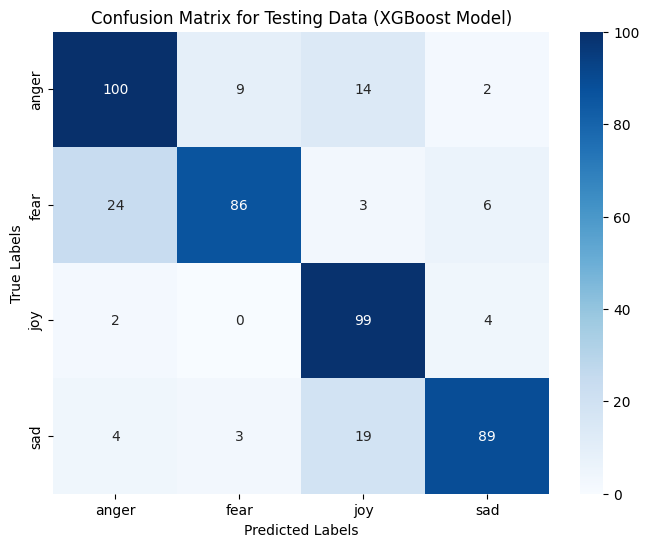

In [23]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fitting the LabelEncoder on the target classes
label_encoder.fit(y_train)

# Converting the target classes to integers
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val_original)
y_test_encoded = label_encoder.transform(y_test_original)

# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initializing the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid,
    n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1
)

# Fitting the RandomizedSearchCV object to the data
random_search.fit(X_train_counts, y_train_encoded)

# Getting the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_


# Making predictions on the training set using the XGBoost classifier trained on the original data
y_pred_train_xgb = best_xgb_model.predict(X_train_counts)

# Inverse transforming the predicted integer labels back to original string labels
y_pred_train_xgb_labels = label_encoder.inverse_transform(y_pred_train_xgb)

# Making predictions on the validation set using the XGBoost classifier trained on the original data
y_pred_val_xgb = best_xgb_model.predict(X_val_original_counts)

# Inverse transforming the predicted integer labels back to original string labels
y_pred_val_xgb_labels = label_encoder.inverse_transform(y_pred_val_xgb)

# Making predictions on the test set using the XGBoost classifier trained on the original data
y_pred_test_xgb = best_xgb_model.predict(X_test_original_counts)

# Inverse transforming the predicted integer labels back to original string labels
y_pred_test_xgb_labels = label_encoder.inverse_transform(y_pred_test_xgb)


# accuracy for the training set (original data)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb_labels)
print("Training Accuracy (XGBoost):", accuracy_train_xgb)

# accuracy for the validation set (original data)
accuracy_val_xgb = accuracy_score(y_val_original, y_pred_val_xgb_labels)
print("Validation Accuracy (XGBoost):", accuracy_val_xgb)

#classification report for the validation set
xgb_validation_creport = (classification_report(y_val_original, y_pred_val_xgb_labels))
print(f"Validation Classification Report:\n {xgb_validation_creport}")


# accuracy for the test set (original data)
accuracy_test_xgb = accuracy_score(y_test_original, y_pred_test_xgb_labels)
print("Test Accuracy (XGBoost):", accuracy_test_xgb)

# classification report for the test set
xgb_test_creport = (classification_report(y_test_original, y_pred_test_xgb_labels))
print(f"Test Classification Report:\n {xgb_test_creport}")

#confusion matrix for the test set (original data)
conf_matrix_xgb = confusion_matrix(y_test_original, y_pred_test_xgb_labels)

print("Confusion Matrix for Testing Data (Naive Bayes Model):")
print(conf_matrix_xgb)

# heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sad'], yticklabels=['anger', 'fear', 'joy', 'sad'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data (XGBoost Model)')
plt.show()

In [27]:
from gensim.parsing.preprocessing import remove_stopwords
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


data = pd.read_csv('finalSentimentdata2.csv')

#mapping for sentiments
mapping = {'fear': 0, 'sad': 1, 'anger': 2, 'joy': 3}
data['sentiment'] = data['sentiment'].map(mapping)

def clean_text_column(row):
    text = row['text'].lower()
    text = re.sub(r'[^(a-zA-Z\s)]', '', text)
    text = re.sub(r'\(', '', text)
    text = re.sub(r'\)', '', text)
    text = text.replace('\n', ' ')
    text = text.strip()
    return text

data['cleaned_text'] = data.apply(clean_text_column, axis=1)

filtered_sentences = []
for tweet in data.cleaned_text:
    filtered_sentences.append(remove_stopwords(tweet))

filter_sentence_df = pd.DataFrame(filtered_sentences, columns=['filter_sentence'])
new_twitter_data = pd.concat([data, filter_sentence_df], axis=1)

import nltk
nltk.download('wordnet')
def normalization(tweet):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet['filter_sentence'].split():
        normalized_text = lem.lemmatize(word, 'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet

new_twitter_data['normalised_tweet'] = new_twitter_data.apply(normalization, axis=1)

MAX_NB_WORDS = 1000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(new_twitter_data.filter_sentence.values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(new_twitter_data.filter_sentence.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = pd.get_dummies(new_twitter_data.sentiment).values

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=2)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=2)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, Y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

accuracy_val = history.history['val_accuracy'][-1]
accuracy_test = model.evaluate(X_test, Y_test, verbose=0)[1]
print('Validation Accuracy: {:0.6f}'.format(accuracy_val))
print('Test Accuracy: {:0.6f}'.format(accuracy_test))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/20
34/34 [==============================] - 54s 1s/step - loss: 1.3577 - accuracy: 0.3412 - val_loss: 1.3033 - val_accuracy: 0.4233
Epoch 2/20
34/34 [==============================] - 47s 1s/step - loss: 1.1435 - accuracy: 0.5201 - val_loss: 0.9944 - val_accuracy: 0.5616
Epoch 3/20
34/34 [==============================] - 45s 1s/step - loss: 0.8254 - accuracy: 0.6602 - val_loss: 0.8440 - val_accuracy: 0.6328
Epoch 4/20
34/34 [==============================] - 43s 1s/step - loss: 0.6440 - accuracy: 0.7471 - val_loss: 0.8577 - val_accuracy: 0.6156
Epoch 5/20
34/34 [==============================] - 41s 1s/step - loss: 0.5370 - accuracy: 0.7869 - val_loss: 0.8662 - val_accuracy: 0.6393
Epoch 6/20
34/34 [==============================] - 40s 1s/step - loss: 0.4360 - accuracy: 0.8497 - val_loss: 0.8990 - val_accuracy: 0.6652
Validation Accuracy: 0.665227
Test Accuracy: 0.646552


In [45]:
accuracy_train_lstm = history.history['accuracy'][-1]  #training accuracy
print('Training Accuracy: {:0.6f}'.format(accuracy_train_lstm))

Training Accuracy: 0.849746


15/15 [==============================] - 2s 116ms/step


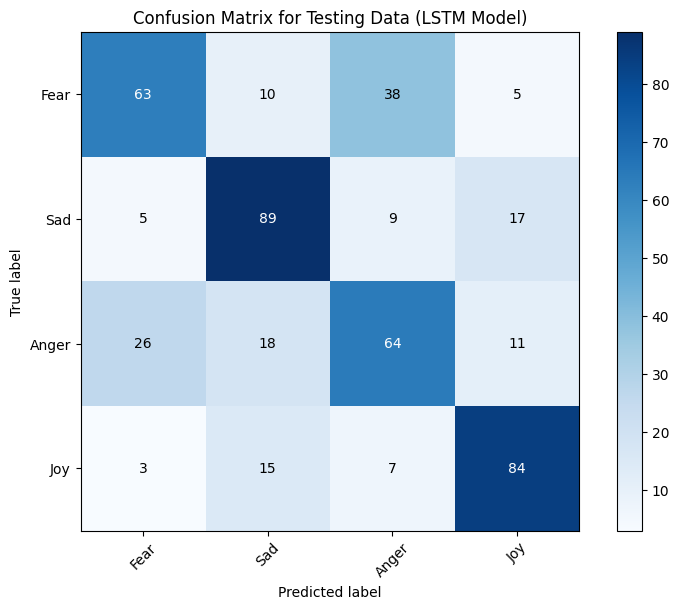

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)


confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


class_labels = ['Fear', 'Sad', 'Anger', 'Joy']

#A function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha='center', va='center',
                     color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=class_labels,
                      title='Confusion Matrix for Testing Data (LSTM Model)')
plt.show()

In [51]:
# Printing classification report for the test set
lstm_test_creport = (classification_report(Y_true, Y_pred_classes))
print(f"Test Classification Report:\n {lstm_test_creport}")

Test Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.54      0.59       116
           1       0.67      0.74      0.71       120
           2       0.54      0.54      0.54       119
           3       0.72      0.77      0.74       109

    accuracy                           0.65       464
   macro avg       0.65      0.65      0.65       464
weighted avg       0.64      0.65      0.64       464



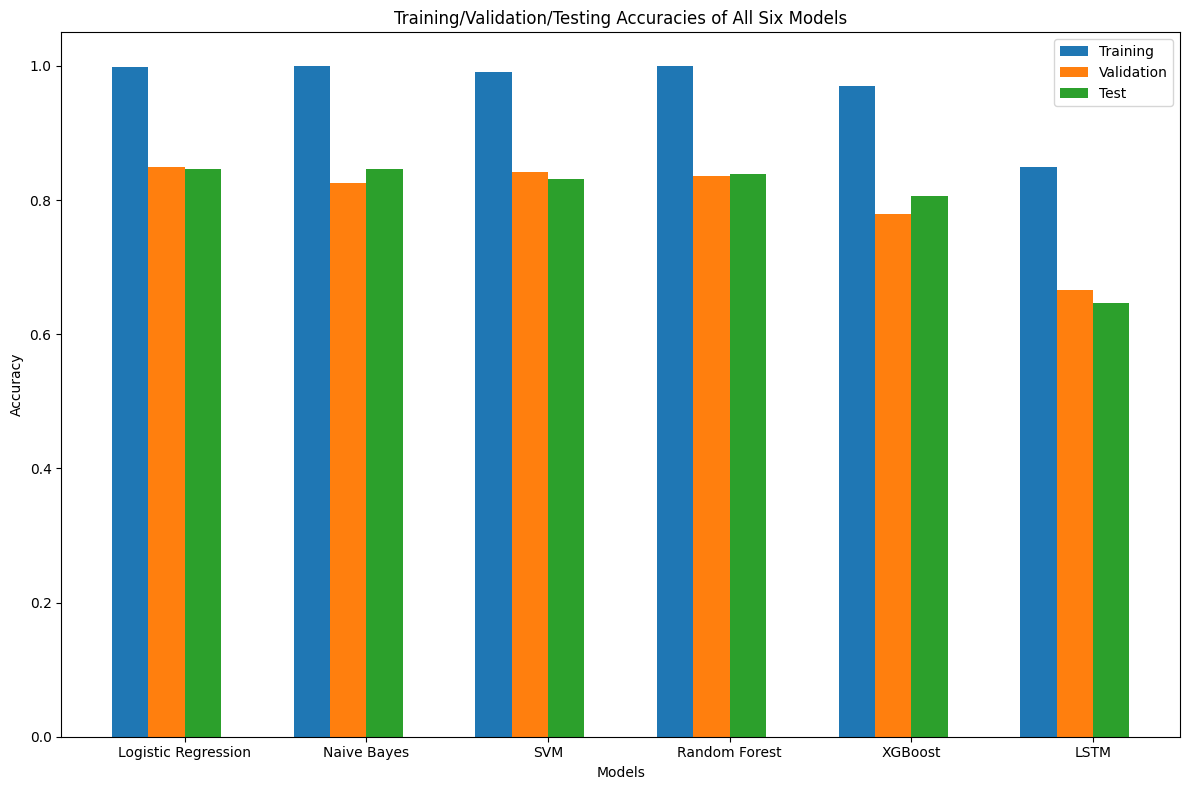

In [57]:
datasets = ['Training', 'Validation', 'Test']
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost', 'LSTM']

accuracies = {
    'Logistic Regression': [accuracy_train_lr, accuracy_val_lr, accuracy_test_lr],
    'Naive Bayes': [accuracy_train_nb, accuracy_val_nb, accuracy_test_nb],
    'SVM': [accuracy_train_svm, accuracy_val_svm, accuracy_test_svm],
    'Random Forest': [accuracy_train_rf, accuracy_val_rf, accuracy_test_rf],
    'XGBoost': [accuracy_train_xgb, accuracy_val_xgb, accuracy_test_xgb],
    'LSTM': [accuracy_train_lstm, accuracy_val, accuracy_test]
}

bar_width = 0.2
bar_positions = np.arange(len(models))

plt.figure(figsize=(12, 8))

for i, dataset in enumerate(datasets):
    plt.bar(bar_positions + i * bar_width, [accuracies[model][i] for model in models], width=bar_width, label=dataset)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training/Validation/Testing Accuracies of All Six Models')
plt.xticks(bar_positions + bar_width * (len(datasets) / 2), models)
plt.legend()
plt.tight_layout()

plt.show()



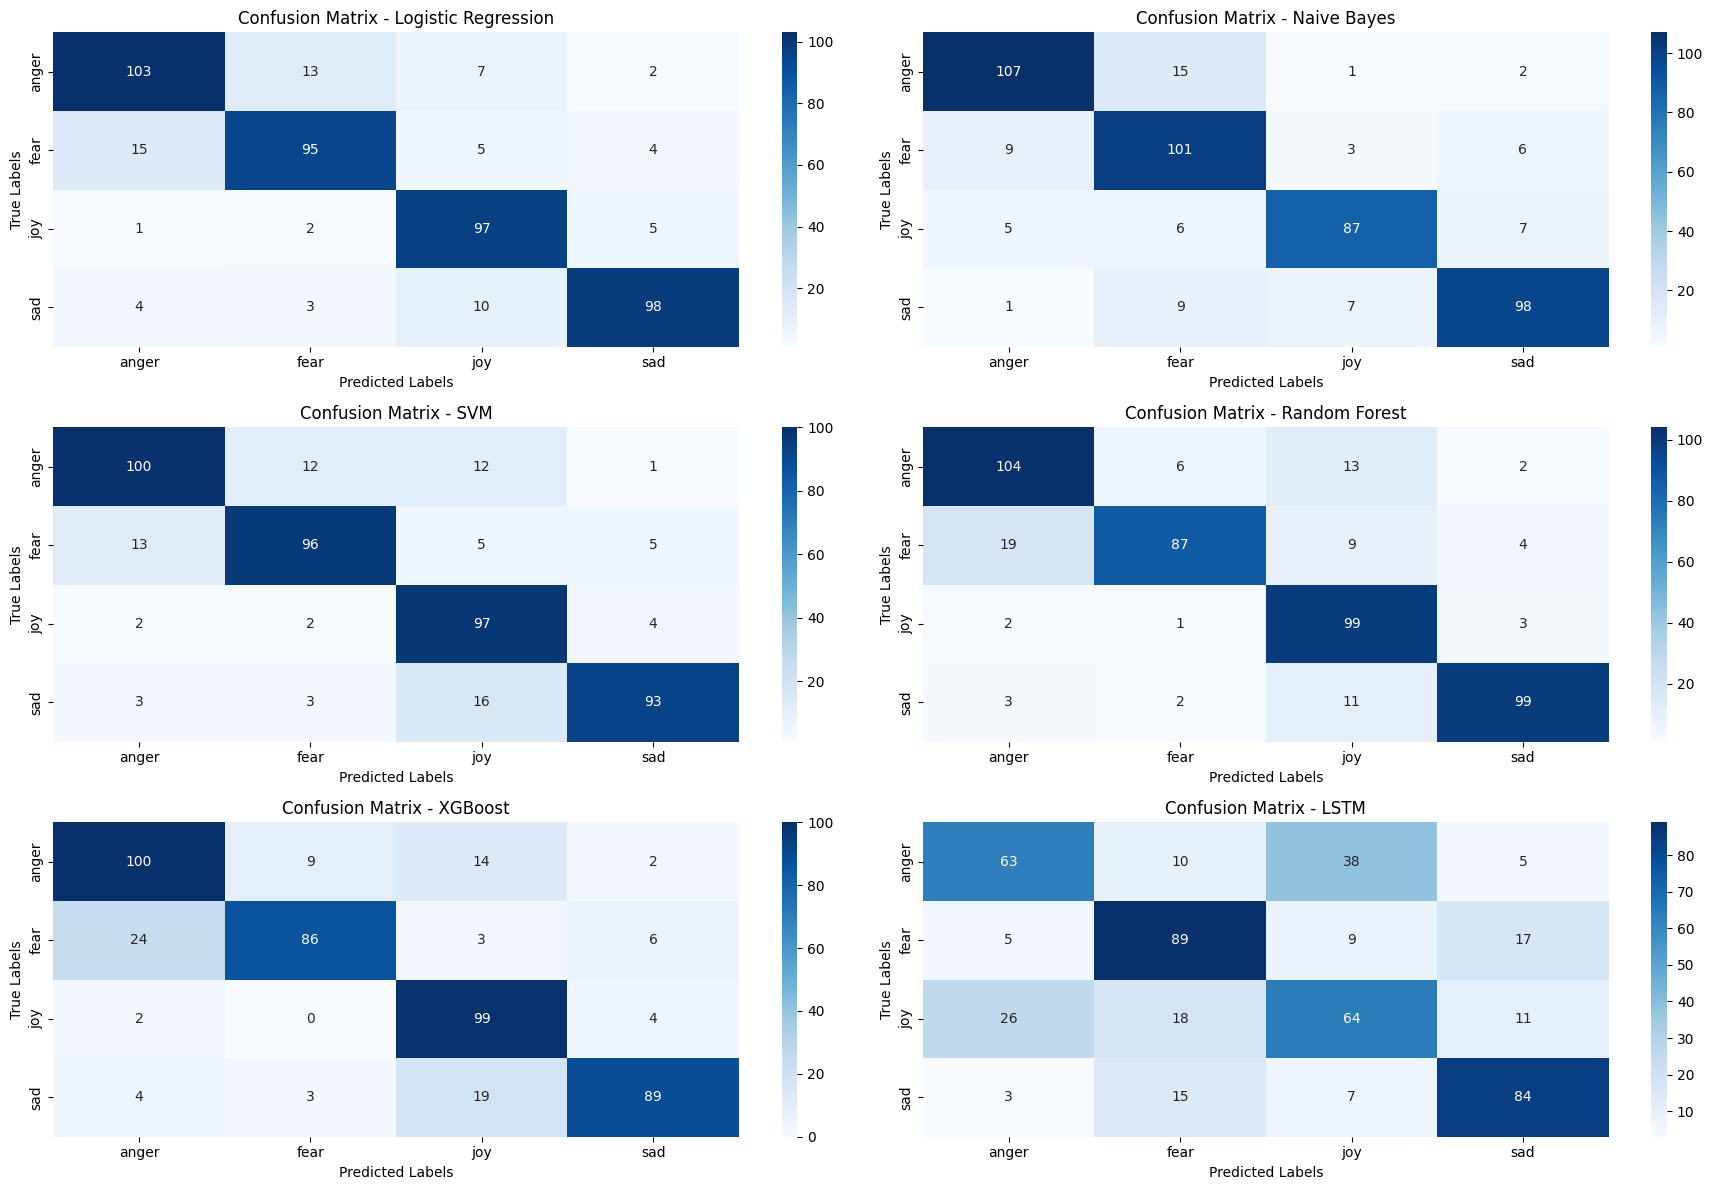

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# List of model names
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost', 'LSTM']

# List of confusion matrices for each model
confusion_matrices = [
    confusion_matrix(y_test_original, y_pred_test_lr),
    confusion_matrix(y_test_original, y_pred_test_nb),
    confusion_matrix(y_test_original, y_pred_test_original),
    confusion_matrix(y_test_original, y_pred_test_rf),
    confusion_matrix(y_test_original, y_pred_test_xgb_labels),  # XGBoost confusion matrix
    confusion_matrix(Y_true, Y_pred_classes),  # LSTM confusion matrix
]

class_labels = ['anger', 'fear', 'joy', 'sad']

# Create subplots for each confusion matrix
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Iterate over each model's confusion matrix and subplot
for i, (model_name, confusion_matrix) in enumerate(zip(models, confusion_matrices)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()
